In [2]:
import pandas as pd

In [51]:
df = pd.read_csv('Listings.csv',encoding = 'unicode_escape',low_memory=False)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279539 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [13]:
df.head(3)

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [52]:
df.host_since = pd.to_datetime(df.host_since) #Converting to date time

In [54]:
df.select_dtypes(include='object').columns

Index(['name', 'host_location', 'host_response_time', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'district', 'city', 'property_type', 'room_type', 'amenities',
       'instant_bookable'],
      dtype='object')

In [55]:
#Here, binary columns are:
bin_cols = ['host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified','instant_bookable']

In [56]:
df[bin_cols].dropna(inplace=True)

C:\Users\hinde\AppData\Local\Temp\ipykernel_23480\3223815501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bin_cols].dropna(inplace=True)


In [57]:
for i in bin_cols:
    df[i] = df[i].apply(lambda x: 1 if x == 't' else 0)

### Converting the price to one currency

In [37]:
df.city.value_counts()

Paris             64690
New York          37012
Sydney            33630
Rome              27647
Rio de Janeiro    26615
Istanbul          24519
Mexico City       20065
Bangkok           19361
Cape Town         19086
Hong Kong          7087
Name: city, dtype: int64

In [58]:
def price_preprocessor(city):

    if city == 'Paris':
        return 88.71
    elif city == 'New York' or city == 'Mexico City':
        return 82.69
    elif city == 'Istanbul':
        return 4.39
    elif city == 'Sydney':
        return 57.45
    elif city == 'Rome':
        return 18.11
    elif city == 'Rio de Janeiro':
        return 15.90
    elif city == 'Bangkok':
        return 2.47
    elif city == 'Cape Town':
        return 4.65
    else:
        return 10.51



In [59]:
df['new_price'] = df['city'].apply(price_preprocessor)

In [63]:
df['new_price'].value_counts()

88.71    64690
82.69    57077
57.45    33630
18.11    27647
15.90    26615
4.39     24519
2.47     19361
4.65     19086
10.51     7087
Name: new_price, dtype: int64

In [64]:
df['final_price'] = df['new_price']*df['price']

In [70]:
df[['city','final_price']].to_csv('Price_var.csv',index=False)

In [72]:
df.head(3)

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,new_price,final_price
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,0,1.0,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,88.71,4701.63
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,0,1.0,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,88.71,10645.20
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,0,1.0,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,88.71,7895.19


### Converting room type to numeric value will later help in price prediction

In [77]:
df['room_type'].value_counts()

Entire place    182005
Private room     86988
Hotel room        5857
Shared room       4862
Name: room_type, dtype: int64

In [78]:
def room_prep(room): #We need to do ordinal encoding
    if room == 'Shared room':
        return 1
    elif room == 'Hotel room':
        return 2
    elif room == 'Private room':
        return 3
    else:
        return 4

In [79]:
df.room_type = df.room_type.apply(room_prep)

### Checking correlation among features
#### Solution to Q.2.

In [84]:
corr_mat = df.drop(['price','new_price'],axis=1).corr()

In [85]:
corr_mat

,listing_id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,final_price
listing_id,1.000000,0.582679,-0.014195,0.109949,-0.030678,0.071972,0.001928,0.021359,-0.012022,-0.001949,...,-0.005873,-0.026382,-0.047476,-0.025831,-0.065647,-0.067393,0.016243,-0.020410,0.248409,0.014322
host_id,0.582679,1.000000,-0.082474,0.122923,-0.064693,0.015198,-0.023783,-0.123407,0.005266,0.008961,...,-0.003148,-0.089288,-0.095226,-0.055538,-0.100904,-0.103973,-0.046701,-0.067068,0.228137,0.008422
host_response_rate,-0.014195,-0.082474,1.000000,0.321510,0.215225,0.037986,0.036184,0.168059,-0.015872,-0.018426,...,0.000048,0.112409,0.108358,0.118284,0.106289,0.120641,0.091927,0.099234,0.053940,0.011804
host_acceptance_rate,0.109949,0.122923,0.321510,1.000000,0.176316,0.034085,0.014588,0.100422,0.073135,-0.003525,...,0.000307,-0.017294,-0.007801,0.028197,-0.013868,-0.011385,0.005349,0.000529,0.347575,0.004449
host_is_superhost,-0.030678,-0.064693,0.215225,0.176316,1.000000,-0.023472,0.021645,0.137860,-0.006738,-0.068604,...,-0.001729,0.201202,0.179916,0.213582,0.143942,0.147957,0.116681,0.186098,0.035782,0.012646
host_total_listings_count,0.071972,0.015198,0.037986,0.034085,-0.023472,1.000000,0.004700,0.039111,-0.042281,0.061737,...,-0.000303,-0.037162,-0.040658,-0.016856,-0.036414,-0.045739,-0.005259,-0.049027,0.057877,0.009625
host_has_profile_pic,0.001928,-0.023783,0.036184,0.014588,0.021645,0.004700,1.000000,0.059439,0.003721,-0.007308,...,0.000230,0.013349,0.012735,0.008972,0.008238,0.010920,0.008610,0.006891,-0.002014,0.000822
host_identity_verified,0.021359,-0.123407,0.168059,0.100422,0.137860,0.039111,0.059439,1.000000,0.061223,-0.037173,...,0.002251,0.049754,0.054161,0.047383,0.039560,0.048585,0.057676,0.036643,0.006048,0.007655
latitude,-0.012022,0.005266,-0.015872,0.073135,-0.006738,-0.042281,0.003721,0.061223,1.000000,-0.417783,...,0.001569,-0.034199,-0.007049,-0.035079,-0.023368,-0.011368,-0.043589,-0.022222,0.002959,-0.012598
longitude,-0.001949,0.008961,-0.018426,-0.003525,-0.068604,0.061737,-0.007308,-0.037173,-0.417783,1.000000,...,-0.001410,-0.048905,-0.052181,-0.045029,-0.043660,-0.033794,-0.052074,-0.039725,0.046586,-0.077740


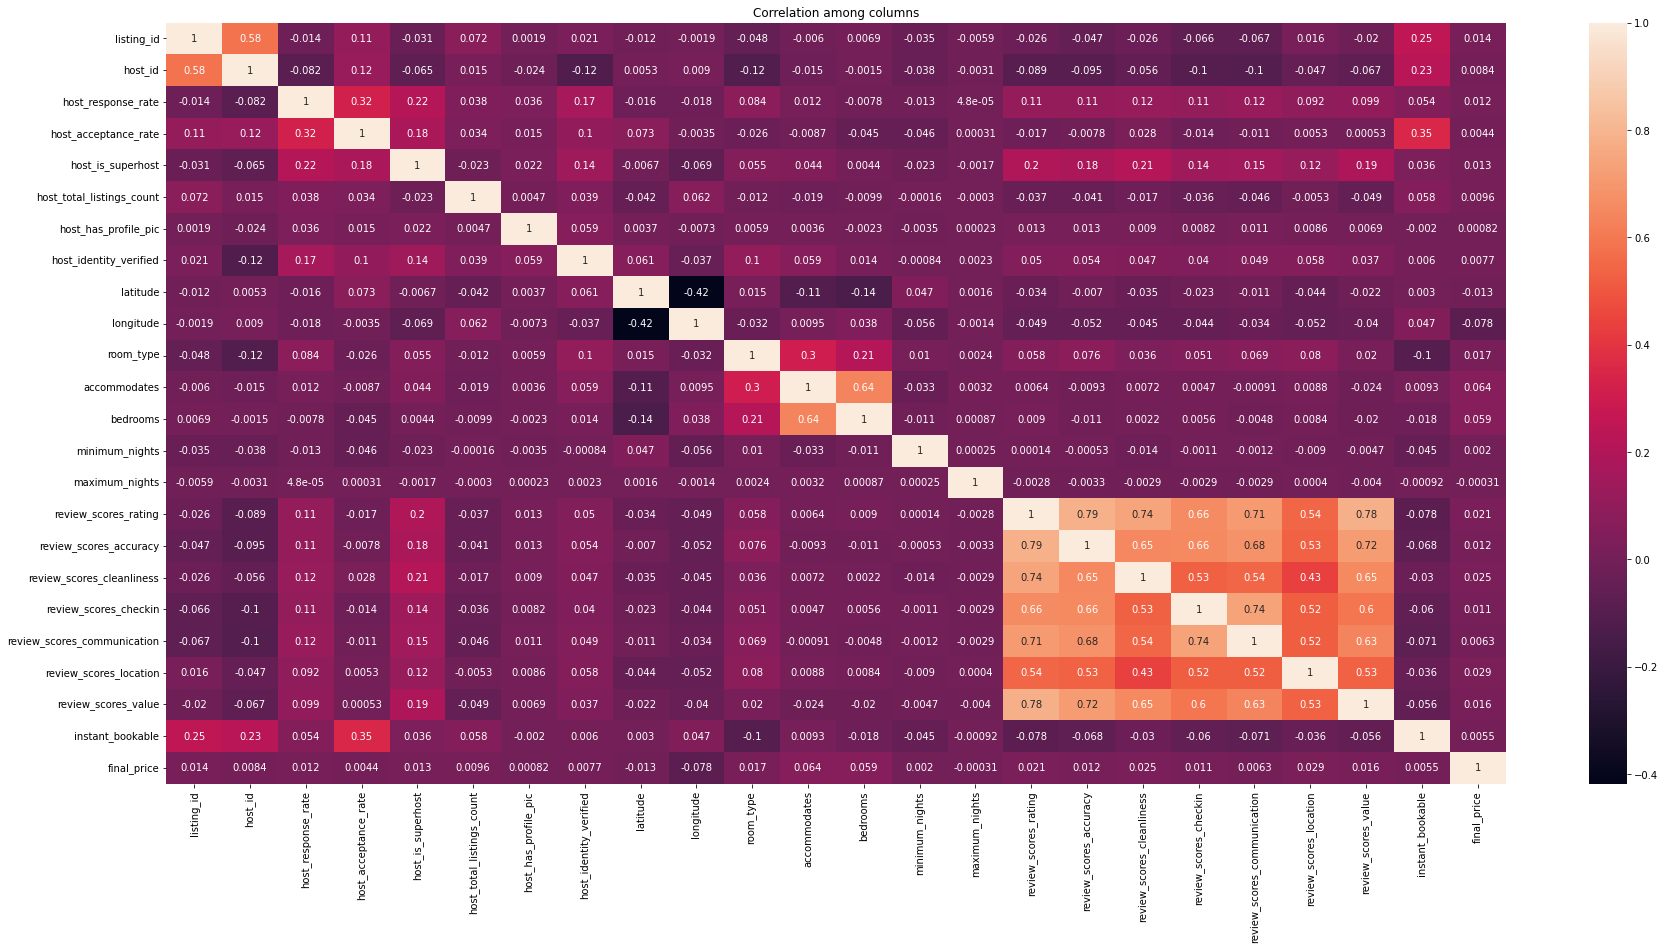

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30,14))
plt.title("Correlation among columns")
sns.heatmap(corr_mat,annot=True)
plt.show()